In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=3000, regularization_strength=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.regularization_strength = regularization_strength
        self.cost_history = []

    #sigmoid function to squish everything between 0 to 1, the premise of logistic regression
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    #cost function 
    def compute_cost(self, y, y_predicted):
        n_samples = len(y)
        cost = (-1 / n_samples) * (np.dot(y, np.log(y_predicted)) + np.dot((1 - y), np.log(1 - y_predicted)))
        cost += (self.regularization_strength / (2 * n_samples)) * np.sum(np.square(self.weights))
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initializing all parameters with zero
        self.bias = 0

        # Gradient descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.regularization_strength * self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store cost
            cost = self.compute_cost(y, y_predicted)
            self.cost_history.append(cost)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

if __name__ == "__main__":
    df = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Train_data.csv")
   
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    print("data set before feature scaling \n")
    print(X)
    print('\n')
    # Scaling done, basically each of the mentioned feature is squeezed down according to the formula z = (x - mean)/variance , where variance is 1
    #this is done in logistic regression to improve the model's accuracy and prevent any one feature to dominate the model, and creates a level field
   
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    print("data set after feature scaling \n")
    print(X)
    print('\n')
    
    # Train-test split using the train_test_split function, which allots, 20% of the input data to be used to test the model and 80% to train 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Trainin the model using above class
    model = LogisticRegression(learning_rate=0.01, epochs=3000, regularization_strength=0.01)
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)

    # Checking model accuracy
    def accuracy(predictions, y_test):
        return np.sum(predictions == y_test) / len(y_test)

    acc = accuracy(predictions, y_test)
    print(f"Accuracy: {acc * 100}%")

    # Plotting the change of cost function over the iterations/epochs
    plt.plot(range(model.epochs), model.cost_history)
    plt.xlabel('iterations')
    plt.ylabel('Cost function')
    plt.title('Cost Function during Training')
    plt.show()


data set before feature scaling 

[[0 'tcp' 'ftp_data' ... 0.0 0.05 0.0]
 [0 'udp' 'other' ... 0.0 0.0 0.0]
 [0 'tcp' 'private' ... 1.0 0.0 0.0]
 ...
 [0 'tcp' 'private' ... 0.0 1.0 1.0]
 [0 'tcp' 'nnsp' ... 1.0 0.0 0.0]
 [0 'tcp' 'finger' ... 1.0 0.0 0.0]]




ValueError: could not convert string to float: 'tcp'

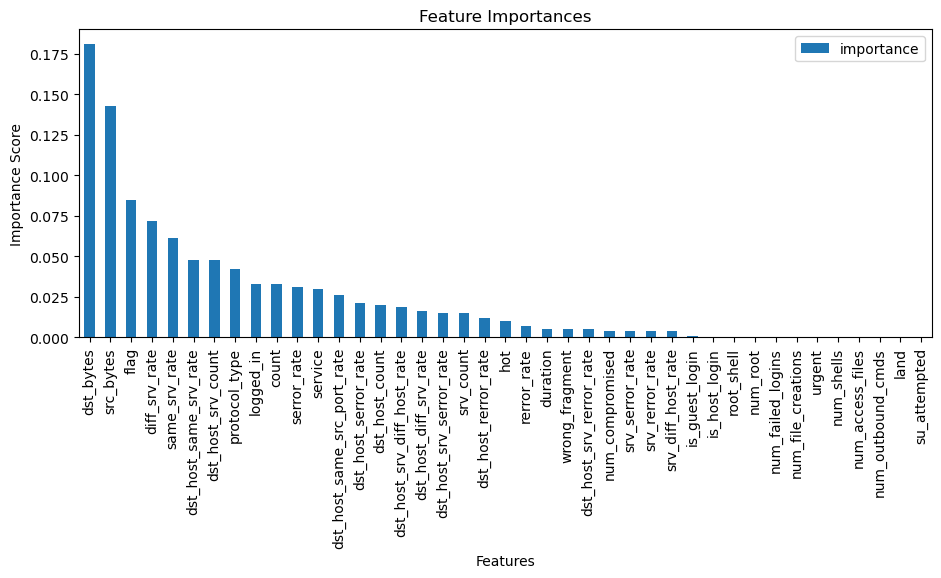

In [27]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 2: Load the dataset  # Replace with your CSV file path
data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Train_data.csv")

# Step 3: Preprocess the data
# Drop non-numeric columns except 'class'
data_numeric = data.drop(columns=['protocol_type', 'service', 'flag'])

# Encode categorical columns
label_encoders = {}
for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data_preprocessed = pd.concat([data_numeric.drop(columns=['class']), data[['protocol_type', 'service', 'flag']]], axis=1)

y = data['class'].map({'normal': 0, 'anomaly': 1})


# using feature_importances_ of RandomForestClassifier for detecting important parameters affecting our 'anomaly' vs 'normal' packets
#indicates how much each feature in the columns contribute to the model prediction

rfc = RandomForestClassifier(random_state=42)
rfc.fit(data_preprocessed, y)
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': data_preprocessed.columns, 'importance': score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Plotting the feature importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

#Here, we are training the data using Logistic regression model.
# Step 2: Load the dataset  # Replace with your CSV file path
data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Train_data.csv")

# Step 3: Preprocess the data
# Drop non-numeric columns except 'class'
data_numeric = data.drop(columns=['protocol_type', 'service', 'flag'])

# Encode categorical columns if necessary, basically putting a number tag on text data in the cells
label_encoders = {}
for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Concatinating the removed columns (ones who had text) and replacing them with numbers
data_preprocessed = pd.concat([data_numeric.drop(columns=['class']), data[['protocol_type', 'service', 'flag']]], axis=1)

# Extract the target variable
y = data['class'].map({'normal': 0, 'anomaly': 1})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_preprocessed)

# Step 4: Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)

# Split the data into training and testing sets
X_train = principal_components[:20000]
y_train = y[:20000]
X_test = principal_components[20000:]
y_test = y[20000:]

# Step 5: Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}")

classification_report_test = classification_report(y_test, y_pred)
print("Classification Report for Test Set:")
print(classification_report_test)


# Making a CSV file to store the data 
data.to_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Preprocessed_Train_data.csv", index=False)


Model accuracy: 94.80
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2756
           1       0.96      0.93      0.94      2436

    accuracy                           0.95      5192
   macro avg       0.95      0.95      0.95      5192
weighted avg       0.95      0.95      0.95      5192



In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

#Here, we are going to apply Decision Trees algorithm to detect anomalies, we will see it gives better accuracy response as compared to Logistic regression
# Step 2: Load the dataset  # Replace with your CSV file path
data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Train_data.csv")

# Step 3: Preprocess the data
# Drop non-numeric columns except 'class'
data_numeric = data.drop(columns=['protocol_type', 'service', 'flag'])

# Encode categorical columns if necessary, basically putting a number tag on text data in the cells
label_encoders = {}
for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Concatenate the removed columns (ones who had text) and replace them with numbers
data_preprocessed = pd.concat([data_numeric.drop(columns=['class']), data[['protocol_type', 'service', 'flag']]], axis=1)

# Extract the target variable
y = data['class'].map({'normal': 0, 'anomaly': 1})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_preprocessed)

# Step 4: Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)

# Split the data into training and testing sets
X_train = principal_components[:20000]
y_train = y[:20000]
X_test = principal_components[20000:]
y_test = y[20000:]

# Step 5: Train Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}")

classification_report_test = classification_report(y_test, y_pred)
print("Classification Report for Test Set:")
print(classification_report_test)

# Save the scaler, PCA, and Decision Tree model to disk
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(decision_tree, 'decision_tree.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


# Save the preprocessed data as a new CSV file
data.to_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Preprocessed_Train_data_2.csv", index=False)
 

Model accuracy: 98.88
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2756
           1       0.99      0.99      0.99      2436

    accuracy                           0.99      5192
   macro avg       0.99      0.99      0.99      5192
weighted avg       0.99      0.99      0.99      5192



In [31]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib


#Here, we are going to apply K-nearest neighbours algorithm, gives the highest accuracy response of the three algorithms we are applying.
# Step 2: Load the dataset  # Replace with your CSV file path
data = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Train_data.csv")

# Step 3: Preprocess the data
# Drop non-numeric columns except 'class'
data_numeric = data.drop(columns=['protocol_type', 'service', 'flag'])

# Encode categorical columns if necessary, basically putting a number tag on text data in the cells
label_encoders = {}
for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Concatenate the removed columns (ones who had text) and replace them with numbers
data_preprocessed = pd.concat([data_numeric.drop(columns=['class']), data[['protocol_type', 'service', 'flag']]], axis=1)

# Extract the target variable
y = data['class'].map({'normal': 0, 'anomaly': 1})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_preprocessed)

# Step 4: Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)

# Split the data into training and testing sets
X_train = principal_components[:20000]
y_train = y[:20000]
X_test = principal_components[20000:]
y_test = y[20000:]

# Step 5: Train K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}")

classification_report_test = classification_report(y_test, y_pred)
print("Classification Report for Test Set:")
print(classification_report_test)
print()

# Save the scaler, PCA, and KNN model to disk
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(knn, 'knn.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


# Save the preprocessed data as a new CSV file
data.to_csv(r"C:\Users\shubh\OneDrive\Desktop\SOC_cyberguard\Preprocessed_Train_data_3.csv", index=False)


Model accuracy: 99.15
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2756
           1       0.99      0.99      0.99      2436

    accuracy                           0.99      5192
   macro avg       0.99      0.99      0.99      5192
weighted avg       0.99      0.99      0.99      5192


